In [708]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.integrate import solve_ivp

Reproducing Figure 1a in Mazor et al. 2016 where anti-CD4 variants bind to CD4+ T cells

In [709]:
#Params

array = np.linspace(1, 9, 50)

A0s1 = [1e-11, 1e-10, 1e-9, 1e-8]
A0s = []

for x in A0s1:
    for val in array:
        A0s.append(x*val)

kons = [2.1e5, 1.7e5, 3e5, 2.8e5]
koffs = [1.8e-4, 4.2e-3, 1.6e-2, 2e-2]
delta = 10
rtot = 1.5e5

In [710]:
def model(t, z, k, koff, Ainit, delta=delta):
    dA1 = (2/rtot)*k*(rtot-z[0]-2*z[1])*(((50*((Ainit/1e-6)/(0.01 + (Ainit/1e-6))))*rtot)-z[0]-z[1]) - koff*z[0] - (delta/rtot)*k*(rtot-z[0]-2*z[1])*z[0] + 2*koff*z[1]
    dA2 = (delta/rtot)*k*(rtot-z[0]-2*z[1])*z[0] - 2*koff*z[1]

    return [dA1, dA2]

In [711]:
t_end = 5000000000
t = np.geomspace(1e-6, t_end, 5000)
tspan = [0, t_end]
z0 = [0, 0]

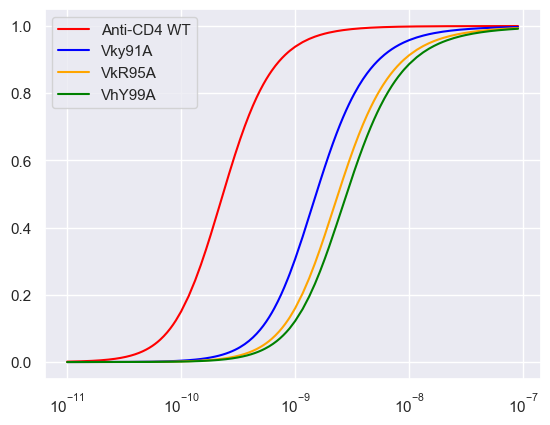

In [712]:
solutions = []

for i in range(len(kons)):
    kon = kons[i]
    koff = koffs[i]
    vals = []
    for Ainit in A0s:
        k = Ainit*kon
        z = solve_ivp(model, tspan, z0, args=(k, koff, Ainit), method='Radau', t_eval=t)
        r = (rtot - (rtot - z.y[0] - 2*z.y[1]))/rtot
        vals.append(r[-1])
    solutions.append(vals)

labels = ['Anti-CD4 WT', 'Vky91A', 'VkR95A', 'VhY99A']
colors = ['red', 'blue', 'orange', 'green']
for i in range(len(solutions)):
    plt.plot(A0s, solutions[i], label=labels[i], color=colors[i])

sns.set_theme()
plt.legend(loc='best')
plt.xscale('log')
plt.show()

monovalent vs bivalent curves

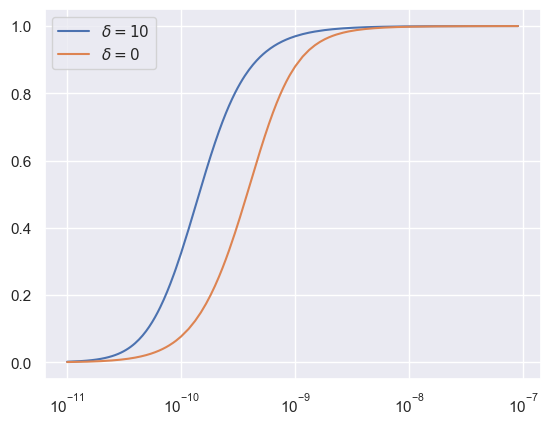

In [713]:
kon = 2e5
koff = 2e-4
deltas = [100, 0]
solutions = []

for delta in deltas:
    vals = []
    for A0 in A0s:
        k = A0*kon
        z = solve_ivp(model, tspan, z0, args=(k, koff, A0, delta), method='Radau', t_eval=t)
        r = (rtot - (rtot - z.y[0] - 2*z.y[1]))/rtot
        vals.append(r[-1])
    solutions.append(vals)

plt.plot(A0s, solutions[0], label=r'$\delta=10$')
plt.plot(A0s, solutions[1], label=r'$\delta=0$')
plt.xscale('log')
plt.legend(loc='best')
plt.show()